# pandas


Пакет для статистической обработки данных, по функциональности близкий к R.

In [0]:
import numpy as np
import pandas as pd

## Series

Одномерный набор данных. Отсутствующий данные записываются как `np.nan` (в этот день термометр сломался или метеоролог был пьян); они не участвуют в вычислении средних, среднеквадратичных отклонений и т.д.

In [0]:
l=[1,3,5,np.nan,6,8]
s=pd.Series(l)
s

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64


Основная информация о наборе данных: среднее, среднеквадратичное отклонение, минимум, максимум, медиана (которая отличается от среднего для несимметричных распределений).

In [0]:
s.describe()

count    5.000000
mean     4.600000
std      2.701851
min      1.000000
25%      3.000000
50%      5.000000
75%      6.000000
max      8.000000
dtype: float64

Обычная индексация.

In [0]:
s[2]

5.0

In [0]:
s[2]=7
s

0    1.0
1    3.0
2    7.0
3    NaN
4    6.0
5    8.0
dtype: float64

In [0]:
s[2:5]

2    7.0
3    NaN
4    6.0
dtype: float64

In [0]:
s1=s[1:]
s1

1    3.0
2    7.0
3    NaN
4    6.0
5    8.0
dtype: float64

In [0]:
s2=s[:-1]
s2

0    1.0
1    3.0
2    7.0
3    NaN
4    6.0
dtype: float64


В сумме `s1+s2` складываются данные с одинаковыми индексами. Поскольку в `s1` нет данного и индексом 0, а в `s2` - с индексом 5, в `s1+s2` в соответствующих позициях будет `NaN`.

In [0]:
s1+s2

0     NaN
1     6.0
2    14.0
3     NaN
4    12.0
5     NaN
dtype: float64


К наборам данных можно применять функции из `numpy`.

In [0]:
np.exp(s)

0       2.718282
1      20.085537
2    1096.633158
3            NaN
4     403.428793
5    2980.957987
dtype: float64

При создании набора данных s мы не указали, что будет играть роль индекса. По умолчанию это последовательность целых чисел 0, 1, 2, ...

In [0]:
s.index

RangeIndex(start=0, stop=6, step=1)


Но можно создавать наборы данных с индексом, заданным списком.

In [0]:
i=list('abcdef')
i

['a', 'b', 'c', 'd', 'e', 'f']

In [0]:
s=pd.Series(l,index=i)
s

a    1.0
b    3.0
c    5.0
d    NaN
e    6.0
f    8.0
dtype: float64

In [0]:
s['c']

5.0

Если индекс - строка, то вместо s['c'] можно писать s.c.

In [0]:
s.c

5.0

Набор данных можно создать из словаря.

In [0]:
s=pd.Series({'a':1,'b':2,'c':0})
s

a    1
b    2
c    0
dtype: int64


Можно отсортировать набор данных.

In [0]:
s.sort_values()

c    0
a    1
b    2
dtype: int64

Роль индекса может играть, скажем, последовательность дат (или времён измерения и т.д.).

In [0]:
d=pd.date_range('20160101',periods=10)
d

DatetimeIndex(['2016-01-01', '2016-01-02', '2016-01-03', '2016-01-04',
               '2016-01-05', '2016-01-06', '2016-01-07', '2016-01-08',
               '2016-01-09', '2016-01-10'],
              dtype='datetime64[ns]', freq='D')

In [0]:
s=pd.Series(np.random.normal(size=10),index=d)
s

2016-01-01   -0.549086
2016-01-02    1.734690
2016-01-03    0.071446
2016-01-04    1.150794
2016-01-05    0.164471
2016-01-06    1.268178
2016-01-07    0.813991
2016-01-08   -1.483954
2016-01-09    0.339218
2016-01-10    1.210594
Freq: D, dtype: float64

Операции сравнения возвращают наборы булевых данных.

In [0]:
s>0

2016-01-01    False
2016-01-02     True
2016-01-03     True
2016-01-04     True
2016-01-05     True
2016-01-06     True
2016-01-07     True
2016-01-08    False
2016-01-09     True
2016-01-10     True
Freq: D, dtype: bool

Если такой булев набор использовать для индексации, получится поднабор только из тех данных, для которых условие есть True.

In [0]:
s[s>0]

2016-01-02    1.734690
2016-01-03    0.071446
2016-01-04    1.150794
2016-01-05    0.164471
2016-01-06    1.268178
2016-01-07    0.813991
2016-01-09    0.339218
2016-01-10    1.210594
dtype: float64

**Задание:** Вам дан массив из 1000 чисел. Оставьте в нем только те числа, которые делятся на 29, а их последняя цифра равна 3.

In [0]:
s = pd.Series(np.arange(1000))

# YOUR CODE HERE

Кумулятивные максимумы - от первого элемента до текущего.

In [0]:
s.cummax()

2016-01-01   -1.135194
2016-01-02   -0.764255
2016-01-03    1.417535
2016-01-04    1.417535
2016-01-05    1.417535
2016-01-06    1.417535
2016-01-07    1.417535
2016-01-08    1.417535
2016-01-09    1.417535
2016-01-10    1.417535
Freq: D, dtype: float64


Кумулятивные суммы.

In [0]:
s=s.cumsum()
s

2016-01-01   -1.135194
2016-01-02   -1.899449
2016-01-03   -0.481915
2016-01-04   -0.650025
2016-01-05   -1.388682
2016-01-06   -2.221941
2016-01-07   -1.308410
2016-01-08   -1.842560
2016-01-09   -1.887833
2016-01-10   -2.709318
Freq: D, dtype: float64


Построим график.

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


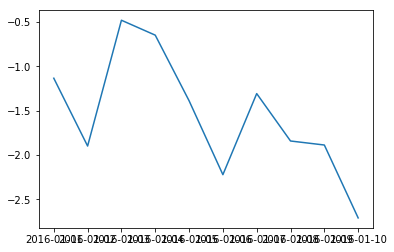

In [0]:
plt.plot(s)

## DataFrame

Двумерная таблица данных. Имеет индекс и набор столбцов (возможно, имеющих разные типы). Таблицу можно построить, например, из словаря, значениями в котором являются одномерные наборы данных.

In [0]:
d={'one':pd.Series([1,2,3],index=['a','b','c']),
   'two':pd.Series([1,2,3,4],index=['a','b','c','d'])}
df=pd.DataFrame(d)
df

,one,two
a,1.0,1
b,2.0,2
c,3.0,3
d,NaN,4


In [0]:
df.index

Index(['a', 'b', 'c', 'd'], dtype='object')

In [0]:
df.columns

Index(['one', 'two'], dtype='object')

Если в качестве индекса указать имя столбца, получится одномерный набор данных.

In [0]:
df['one']

a    1.0
b    2.0
c    3.0
d    NaN
Name: one, dtype: float64

In [0]:
df.one

a    1.0
b    2.0
c    3.0
d    NaN
Name: one, dtype: float64

In [0]:
df['one']['c']

3.0


Однако если указать диапазон индексов, то это означает диапазон строк. Причём последняя строка включается в таблицу.

In [0]:
df['b':'d']

,one,two
b,2.0,2
c,3.0,3
d,NaN,4



Диапазон целых чисел даёт диапазон строк с такими номерами, не включая последнюю строку (как обычно при индексировании списков). Всё это кажется довольно нелогичным.

In [0]:
df[1:3]

,one,two
b,2.0,2
c,3.0,3



Логичнее работает атрибут `loc`: первая позиция - всегда индекс строки, а вторая - столбца.

In [0]:
df.loc['b']

one    2.0
two    2.0
Name: b, dtype: float64

In [0]:
df.loc['b','one']

2.0

In [0]:
df.loc['a':'b','one']

a    1.0
b    2.0
Name: one, dtype: float64

In [0]:
df.loc['a':'b',:]

,one,two
a,1.0,1
b,2.0,2


In [0]:
df.loc[:,'one']

a    1.0
b    2.0
c    3.0
d    NaN
Name: one, dtype: float64

К таблице можно добавлять новые столбцы.

In [0]:
df['three']=df['one']*df['two']
df['flag']=df['two']>2
df

,one,two,three,flag
a,1.0,1,1.0,False
b,2.0,2,4.0,False
c,3.0,3,9.0,True
d,NaN,4,NaN,True


Также можно удалять имеющиеся.

In [0]:
#del df['two']
df['foo']=0.
# df.drop(['foo'], axis=1)
del df['foo']
df

,one,two,three,flag
a,1.0,1,1.0,False
b,2.0,2,4.0,False
c,3.0,3,9.0,True
d,NaN,4,NaN,True



Добавим копию столбца `one`, в которую входят только строки до второй.

In [0]:
df['one_tr']=df['one'][:2]
df

,one,two,three,flag,one_tr
a,1.0,1,1.0,False,1.0
b,2.0,2,4.0,False,2.0
c,3.0,3,9.0,True,NaN
d,NaN,4,NaN,True,NaN


In [0]:
df1=df.loc[:,['one','one_tr']]
df1

,one,one_tr
a,1.0,1.0
b,2.0,2.0
c,3.0,NaN
d,NaN,NaN


In [0]:
df1.loc['a', :] = 2
df

,one,two,three,flag,one_tr
a,1.0,1,1.0,False,1.0
b,2.0,2,4.0,False,2.0
c,3.0,3,9.0,True,NaN
d,NaN,4,NaN,True,NaN


Можно объединять таблицы по вертикали и по горизонтали.

In [0]:
df2=pd.DataFrame({'one':{'a':0,'b':1},'one_tr':{'b':2}})
df2

,one,one_tr
a,0,NaN
b,1,2.0


In [0]:
df3 = pd.concat([df,df2], axis=0)
df3

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


,flag,one,one_tr,three,two
a,False,1.0,1.0,1.0,1.0
b,False,2.0,2.0,4.0,2.0
c,True,3.0,NaN,9.0,3.0
d,True,NaN,NaN,NaN,4.0
a,NaN,0.0,NaN,NaN,NaN
b,NaN,1.0,2.0,NaN,NaN


In [0]:
df3.loc['a']

,flag,one,one_tr,three,two
a,False,1.0,1.0,1.0,1.0
a,NaN,0.0,NaN,NaN,NaN


In [0]:
df2=pd.DataFrame({'two':{'a':0,'b':1},'three':{'c':2,'d':3}})
df2

,two,three
a,0.0,NaN
b,1.0,NaN
c,NaN,2.0
d,NaN,3.0


In [0]:
pd.concat([df,df2],axis=1)

,one,one_tr,two,three
a,1.0,1.0,0.0,NaN
b,2.0,2.0,1.0,NaN
c,3.0,NaN,NaN,2.0
d,NaN,NaN,NaN,3.0


Можно загрузить файл с расширением `.csv`:

In [0]:
path_to_file = 'https://gist.githubusercontent.com/bigsnarfdude/515849391ad37fe593997fe0db98afaa/raw/f663366d17b7d05de61a145bbce7b2b961b3b07f/weather.csv'
weather = pd.read_csv(path_to_file)

weather

,outlook,temperature,humidity,windy,play
0,overcast,hot,high,False,yes
1,overcast,cool,normal,True,yes
2,overcast,mild,high,True,yes
3,overcast,hot,normal,False,yes
4,rainy,mild,high,False,yes
5,rainy,cool,normal,False,yes
6,rainy,cool,normal,True,no
7,rainy,mild,normal,False,yes
8,rainy,mild,high,True,no
9,sunny,hot,high,False,no


In [0]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 5 columns):
outlook        14 non-null object
temperature    14 non-null object
humidity       14 non-null object
windy          14 non-null bool
play           14 non-null object
dtypes: bool(1), object(4)
memory usage: 590.0+ bytes


**Задание:** создайте новую таблицу, в которой останутся только солнечные дни из предыдущей

In [0]:
# YOUR CODE HERE

**Задание:** посчитайте вероятность того, что погода будет ветренной, при условии, что:
1. Температура низкая
2. Температура средняя
3. Температура высокая

In [0]:
# YOUR CODE HERE

1: 0.5
2: 0.5
3: 0.25



Создадим таблицу из массива случайных чисел.

In [0]:
df=pd.DataFrame(np.random.randn(10,4),
                columns=['A','B','C','D'])
df

,A,B,C,D
0,-0.291484,0.327617,0.403363,0.041926
1,-0.675192,1.026313,-2.238224,0.374539
2,2.023261,1.687257,-1.152298,-1.241823
3,-2.088508,0.093671,0.871037,-0.416406
4,-0.261602,-1.445817,1.721818,-0.546739
5,0.561505,0.632578,-1.349584,-0.999870
6,1.560347,0.080582,0.305289,0.204322
7,0.776421,-1.156981,0.884690,-1.426620
8,1.297515,-1.301984,1.006153,-0.122549
9,0.407751,0.944550,-0.106827,1.968118


In [0]:
df2=pd.DataFrame(np.random.randn(7,3),columns=['A','B','C'])
df+df2

,A,B,C,D
0,-0.056773,0.506939,0.720457,NaN
1,-2.149057,1.213719,-3.227576,NaN
2,0.055616,1.546940,-1.051634,NaN
3,-1.057564,0.802872,0.082580,NaN
4,0.612061,-2.144345,1.922595,NaN
5,-0.247919,0.457713,0.127022,NaN
6,-0.196123,-1.036504,-1.622852,NaN
7,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN


In [0]:
2*df+3

,A,B,C,D
0,6.614494,2.886846,4.590510,4.241815
1,2.341850,1.686128,3.123202,1.395988
2,0.999415,1.343549,-0.822139,3.617746
3,4.469200,3.116795,5.338836,-0.816360
4,2.469089,4.082797,2.649712,5.545741
5,0.988280,3.854871,1.129988,2.580779
6,4.465617,6.959533,1.093801,3.605573
7,4.414596,1.602035,4.369036,3.172771
8,6.163726,3.400561,3.134096,4.592478
9,1.273356,3.586869,5.066186,2.021879


In [0]:
np.sin(df)

,A,B,C,D
0,-0.287374,0.321788,0.392514,0.041914
1,-0.625047,0.855395,-0.785416,0.365844
2,0.899372,0.993226,-0.913700,-0.946374
3,-0.868954,0.093534,0.764997,-0.404476
4,-0.258628,-0.992200,0.988618,-0.519905
5,0.532461,0.591226,-0.975632,-0.841401
6,0.999945,0.080494,0.300569,0.202904
7,0.700730,-0.915593,0.773719,-0.989625
8,0.962890,-0.964087,0.844780,-0.122243
9,0.396545,0.810233,-0.106624,0.922101


In [0]:
df.describe()

,A,B,C,D
count,10.000000,10.000000,10.000000,10.000000
mean,0.331001,0.088778,0.034542,-0.216510
std,1.209762,1.072920,1.244213,0.980530
min,-2.088508,-1.445817,-2.238224,-1.426620
25%,-0.284013,-0.847590,-0.890930,-0.886588
50%,0.484628,0.210644,0.354326,-0.269477
75%,1.167241,0.866557,0.881277,0.163723
max,2.023261,1.687257,1.721818,1.968118


In [0]:
df.sort_values(by='B')

,A,B,C,D
4,-0.261602,-1.445817,1.721818,-0.546739
8,1.297515,-1.301984,1.006153,-0.122549
7,0.776421,-1.156981,0.884690,-1.426620
6,1.560347,0.080582,0.305289,0.204322
3,-2.088508,0.093671,0.871037,-0.416406
0,-0.291484,0.327617,0.403363,0.041926
5,0.561505,0.632578,-1.349584,-0.999870
9,0.407751,0.944550,-0.106827,1.968118
1,-0.675192,1.026313,-2.238224,0.374539
2,2.023261,1.687257,-1.152298,-1.241823


In [0]:
df.sort_values(by='B')+df

,A,B,C,D
0,-0.582967,0.655234,0.806727,0.083853
1,-1.350384,2.052625,-4.476449,0.749078
2,4.046521,3.374513,-2.304595,-2.483646
3,-4.177016,0.187342,1.742074,-0.832811
4,-0.523204,-2.891633,3.443637,-1.093479
5,1.123010,1.265155,-2.699169,-1.999741
6,3.120693,0.161163,0.610579,0.408645
7,1.552842,-2.313961,1.769380,-2.853240
8,2.595029,-2.603968,2.012307,-0.245099
9,0.815501,1.889099,-0.213654,3.936236


Атрибут iloc подобен loc: первый индекс - номер строки, второй - номер столбца. Это целые числа, конец диапазона на включается (как обычно в питоне).

In [0]:
df.iloc[2]

A   -1.000293
B   -0.828226
C   -1.911069
D    0.308873
Name: 2, dtype: float64

In [0]:
df.iloc[1:3]

,A,B,C,D
1,-0.329075,-0.656936,0.061601,-0.802006
2,-1.000293,-0.828226,-1.911069,0.308873


In [0]:
df.iloc[1:3,0:2]

,A,B
1,-0.329075,-0.656936
2,-1.000293,-0.828226


кумулятивные суммы

In [0]:
cs=df.cumsum()
cs

,A,B,C,D
0,-0.291484,0.327617,0.403363,0.041926
1,-0.966676,1.353930,-1.834861,0.416465
2,1.056585,3.041186,-2.987159,-0.825357
3,-1.031923,3.134857,-2.116121,-1.241763
4,-1.293525,1.689040,-0.394303,-1.788502
5,-0.732019,2.321618,-1.743887,-2.788373
6,0.828327,2.402200,-1.438598,-2.584051
7,1.604748,1.245219,-0.553908,-4.010670
8,2.902263,-0.056765,0.452245,-4.133220
9,3.310013,0.887785,0.345418,-2.165102


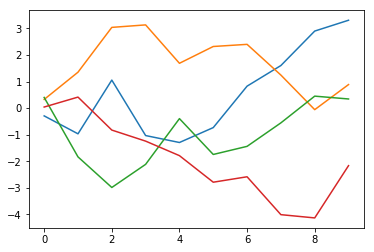

In [0]:
import matplotlib.pyplot as plt
plt.plot(cs);

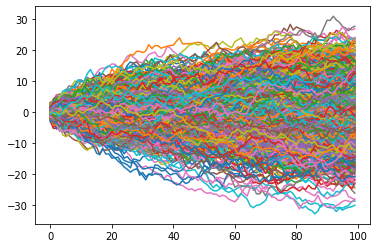

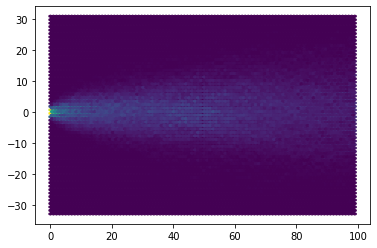

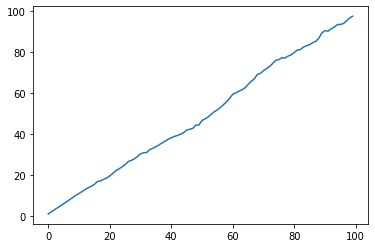

In [0]:
brown = pd.DataFrame(np.random.randn(100,1000)).cumsum()
plt.plot(brown)
plt.show()
plt.hexbin(np.hstack([np.arange(brown.shape[0])]*brown.shape[1]), np.hstack([np.array(brown)[:, i] for i in range(brown.shape[1])]))
plt.show()
plt.plot((brown**2).mean(1))
plt.show()